<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

## Plot time series in pandas with subplots

In [ ]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show()

Preparing data for scikit-learn.

Need to have a particular shape (samples, features)

Make sure data is at least two-dimensional.

Make sure the first dimension is samples.

If not, you should reshape.

If axes are swaped: 
1- array.T.shape
2- array.reshape([-1,1]).shape



# Finance Time series

## Importing from the web with pandas datareader

In [ ]:
from pandas_datareader.data import DataReader
from datetime import date # Date & time functionality

start = date(2010,1,1)
end = date(2019,12,31)
ticker = ['GOOG', 'EBAY','AIG']
data_source = 'yahoo'

stock_data = DataReader(ticker,data_source,start,end)
stock_data

Attributes    Adj Close             ...      Volume            
Symbols            GOOG       EBAY  ...        EBAY         AIG
Date                                ...                        
2010-01-04   312.204773   9.799347  ...  22511600.0   7750900.0
2010-01-05   310.829926   9.696843  ...  26683100.0   8920500.0
2010-01-06   302.994293   9.635342  ...  26368600.0   7163500.0
2010-01-07   295.940735   9.524637  ...  25220000.0   9235500.0
2010-01-08   299.885956   9.639442  ...  30484000.0  12702600.0
...                 ...        ...  ...         ...         ...
2019-12-24  1343.560059  35.808384  ...   2129200.0   1138600.0
2019-12-26  1360.400024  35.847939  ...   4081900.0   2811100.0
2019-12-27  1351.890015  35.669937  ...   6606900.0   2374800.0
2019-12-30  1336.140015  35.402931  ...   6535800.0   2706300.0
2019-12-31  1337.020020  35.709496  ...   7437700.0   2912500.0

[2516 rows x 18 columns]

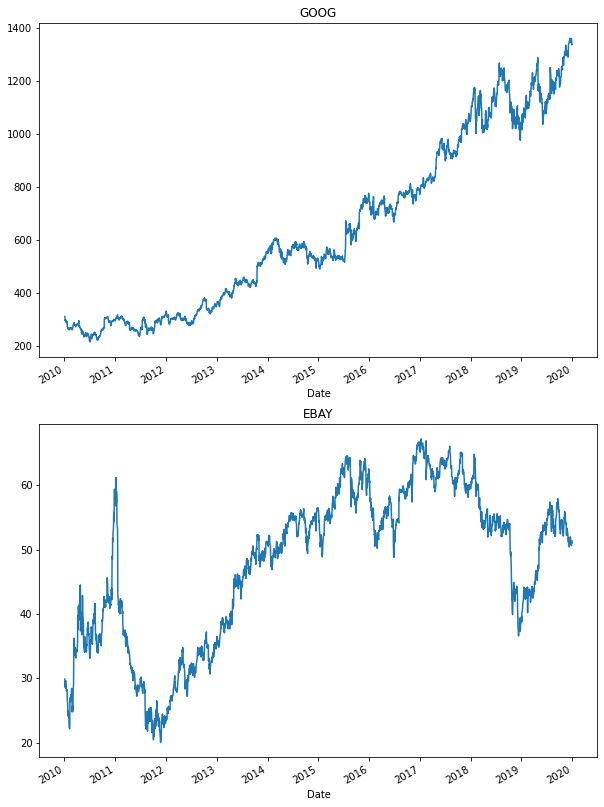

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(10, 15))
stock_data['Close']['GOOG'].plot(title='GOOG', ax=axs[0])
stock_data['Close']['AIG'].plot(title='EBAY', ax=axs[1])
plt.show()

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       504 non-null    float64
 1   Low        504 non-null    float64
 2   Open       504 non-null    float64
 3   Close      504 non-null    float64
 4   Volume     504 non-null    float64
 5   Adj Close  504 non-null    float64
dtypes: float64(6)
memory usage: 27.6 KB


## What happends if we have missing data 

If we have missing data inside time series period of interest.

We should replace NaN into values, so data keeps a continuous form.



In [ ]:
# First we count missing values.

# Count the missing values of each time series
missing_values = df.isna().sum()
print(missing_values)

# When you have missing data points, how can you fill them in?
# There are different interpolation methods to fill in some missing values
# First will create the function interpolate_and_plot()

# Create a function we'll use to interpolate and plot
def interpolate_and_plot(df, interpolation_type):

    # Create a boolean mask for missing values
    missing_values = df.isna()

    # Interpolate the missing values
    df_interp = df.interpolate(interpolation_type)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    df_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    df_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()


# Interpolate using the latest non-missing value
interpolation_type = 'linear'
interpolate_and_plot(df, interpolation_type)

In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

In [ ]:

# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
df_perc = df.rolling(20).apply(percent_change)
df_perc.loc["2014":"2015"].plot()
plt.show()

## Handling outliers

In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

In [ ]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))

    # Calculate a mask for the differences that are > 3 standard deviations from the mean
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
df_perc = df_perc.apply(replace_outliers)
df_perc.loc["2014":"2015"].plot()
plt.show()

# Creating features over time


### Aggregating different statistical method

using aggregate method

A useful tool when using the .aggregate method is the partial function from functool.

np.percentile(df, q=20). Here q= 20 means 20%. Gives the value that is higher than 20% of values.

In [ ]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

to calculate several percentiles of your data using the same percentile() function in numpy.

In [ ]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

### Calculating 'date-based' features

Beyond statistical features like mean,. median, standard deviation, there is really important data asociated with timeseries. Theses are oftern more **'human' features** like days of the week, holidays, and others.




"is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [ ]:
from pandas_datareader.data import DataReader
from datetime import date # Date & time functionality

start = date(2010,1,1)
end = date(2019,12,31)
ticker = ['GOOG']
data_source = 'yahoo'

stock_data = DataReader(ticker,data_source,start,end)
stock_data

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2010-01-04,312.204773,312.204773,313.579620,310.954468,312.304413,3927000.0
2010-01-05,310.829926,310.829926,312.747742,309.609497,312.418976,6031900.0
2010-01-06,302.994293,302.994293,311.761444,302.047852,311.761444,7987100.0
2010-01-07,295.940735,295.940735,303.861053,295.218445,303.562164,12876600.0
2010-01-08,299.885956,299.885956,300.498657,293.455048,294.894653,9483900.0
...,...,...,...,...,...,...
2019-12-24,1343.560059,1343.560059,1350.260010,1342.780029,1348.500000,347500.0
2019-12-26,1360.400024,1360.400024,1361.327026,1344.469971,1346.170044,667500.0


In [ ]:
# Don't forget to MAKE a COPY!!!!

d = stock_data.drop(['Adj Close','High','Low','Open','Volume'],axis=1)
df = d.copy()
df.unstack()
df.columns = df.columns.droplevel(level=0)
df.head()

Symbols,GOOG
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


In [ ]:
# Extract date features from the data, add them as columns
df['day_of_week'] = df.index.dayofweek
df['week_of_year'] = df.index.weekofyear
df['month_of_year'] = df.index.month

# Print prices_perc
df

Symbols,GOOG,day_of_week,week_of_year,month_of_year
Date,,,,
2010-01-04,312.204773,0,1,1
2010-01-05,310.829926,1,1,1
2010-01-06,302.994293,2,1,1
2010-01-07,295.940735,3,1,1
2010-01-08,299.885956,4,1,1
...,...,...,...,...
2019-12-24,1343.560059,1,52,12
2019-12-26,1360.400024,3,52,12
2019-12-27,1351.890015,4,52,12


# Time-delayed features and auto-regressive models

## Creating time-lagged features

Let's see how we could build a model that uses values in the past as input features



In [ ]:
# Create a time shifting data for 3 days.

df.shift(3)

Symbols,GOOG,day_of_week,week_of_year,month_of_year
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN
2010-01-07,312.204773,0.0,1.0,1.0
2010-01-08,310.829926,1.0,1.0,1.0
...,...,...,...,...
2019-12-24,1356.040039,3.0,51.0,12.0
2019-12-26,1349.589966,4.0,51.0,12.0
2019-12-27,1348.839966,0.0,52.0,12.0


In [ ]:
data.describe()

count    2516.000000
mean      643.921354
std       325.706384
min       217.220810
25%       316.365440
50%       562.994751
75%       929.412491
max      1361.170044
Name: GOOG, dtype: float64

In [ ]:
# Create a time-shifted DataFrame

data = df.GOOG

shifts = [0,1,2,3,4,5,6,7]

many_shifts = {'lag_{}'.format(number): data.shift(number) for number in shifts}

many_shifts = pd.DataFrame(many_shifts)

many_shifts

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-04,312.204773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,310.829926,312.204773,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,302.994293,310.829926,312.204773,NaN,NaN,NaN,NaN,NaN
2010-01-07,295.940735,302.994293,310.829926,312.204773,NaN,NaN,NaN,NaN
2010-01-08,299.885956,295.940735,302.994293,310.829926,312.204773,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-24,1343.560059,1348.839966,1349.589966,1356.040039,1352.619995,1355.119995,1361.170044,1347.829956
2019-12-26,1360.400024,1343.560059,1348.839966,1349.589966,1356.040039,1352.619995,1355.119995,1361.170044
2019-12-27,1351.890015,1360.400024,1343.560059,1348.839966,1349.589966,1356.040039,1352.619995,1355.119995


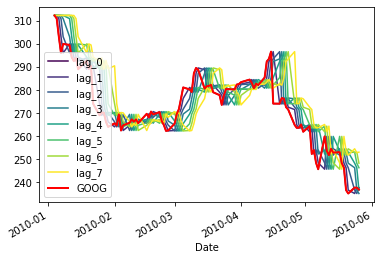

In [ ]:
#first 100 samples of each
ax = many_shifts.iloc[:100].plot(cmap=plt.cm.viridis)
data.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

## Auto-regressive models
Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. You are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.

In [ ]:
import numpy as np
X = many_shifts.fillna(method='bfill',axis=0)
y = data.fillna(np.nanmedian(data))
display(X)
y

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-04,312.204773,312.204773,312.204773,312.204773,312.204773,312.204773,312.204773,312.204773
2010-01-05,310.829926,312.204773,312.204773,312.204773,312.204773,312.204773,312.204773,312.204773
2010-01-06,302.994293,310.829926,312.204773,312.204773,312.204773,312.204773,312.204773,312.204773
2010-01-07,295.940735,302.994293,310.829926,312.204773,312.204773,312.204773,312.204773,312.204773
2010-01-08,299.885956,295.940735,302.994293,310.829926,312.204773,312.204773,312.204773,312.204773
...,...,...,...,...,...,...,...,...
2019-12-24,1343.560059,1348.839966,1349.589966,1356.040039,1352.619995,1355.119995,1361.170044,1347.829956
2019-12-26,1360.400024,1343.560059,1348.839966,1349.589966,1356.040039,1352.619995,1355.119995,1361.170044
2019-12-27,1351.890015,1360.400024,1343.560059,1348.839966,1349.589966,1356.040039,1352.619995,1355.119995


Date
2010-01-04     312.204773
2010-01-05     310.829926
2010-01-06     302.994293
2010-01-07     295.940735
2010-01-08     299.885956
                 ...     
2019-12-24    1343.560059
2019-12-26    1360.400024
2019-12-27    1351.890015
2019-12-30    1336.140015
2019-12-31    1337.020020
Name: GOOG, Length: 2516, dtype: float64

When you use time-lagged features on the raw data, you see that the highest coefficient by far is the first one. This means that the N-1th time point is useful in predicting the Nth timepoint, but no other points are useful.

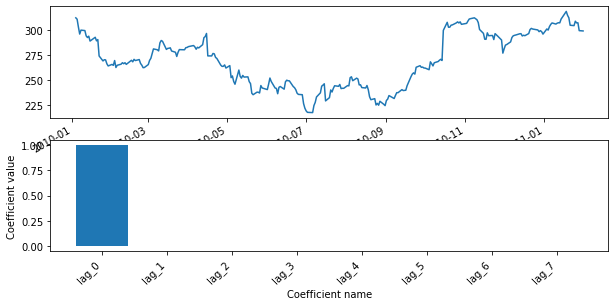

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X,y)

def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, X.columns, ax=axs[1])
plt.show()

